In [1]:
%matplotlib inline

In [2]:
from galsize_models.models.load_baseline_catalogs import load_umachine_mock
mock = load_umachine_mock()
print(mock.keys())

Total runtime = 39.43 seconds
['obs_sfr', 'icl', 'upid', 'mpeak', 'sfr', 'halo_id', 'mvir', 'rvir', 'vmax_at_mpeak', 'vx', 'a_first_infall', 'sm', 'vy', 'y', 'x', 'vz', 'z', 'dvmax_zscore', 'obs_sm', 'halo_hostid', 'host_halo_rvir', 'host_halo_mvir', 'ssfr', 'is_main_sequence', 'is_green_valley', 'is_quenched', 'logsm', 'rvir_halo_kpc', 'spin_at_infall', 'bt_meert15_random']


In [3]:
from galsize_models.measurements import load_umachine_sdss_with_meert15
full_sdss, behroozi_complete, good_profile_mask = load_umachine_sdss_with_meert15()

sdss = full_sdss[behroozi_complete & good_profile_mask]
print(sdss.keys())


['ra', 'dec', 'z', 'bptclass', 'sm', 'sfr', 'specsfr', 'sm_fib', 'sfr_fib', 'specsfr_fib', 'withinr', 'eligiblehost', 'sm_complete', 'eligiblehost2', 'd4000', 'd4000_sub', 'd4000_n', 'd4000_n_sub', 'has_match', 'logM_mendel13', 'logMB_mendel13', 'logMD_mendel13', 'pps_mendel13', 'type_mendel13', 'deltaBD_mendel13', 'dr7_objID', 'has_meert15_match', 'r50_magr_kpc_meert15', 'Magr_tot_meert15', 'Magr_bulge_meert15', 'Magr_disk_meert15', 'gr_bulge_meert15', 'gr_disk_meert15', 'morph_type_T_meert15', 'gr_kcorr_meert15', 'bulge_to_total_rband_meert15', 'ssfr']


In [4]:
from galsize_models.models import bulge_disk_double_power_law as bddpl


mock['r50_magr_kpc_meert15'] = bddpl.galaxy_size_vs_rhalo(mock['rvir_halo_kpc'], 
                                                    mock['bt_meert15_random'], 
                                                    bddpl.fiducial_norm_bulge, 
                                                    bddpl.fiducial_norm_disk,
                                                    bddpl.fiducial_alpha_bulge,
                                                    bddpl.fiducial_alpha_disk,
                                                    scatter=0.2)

In [5]:
from halotools.empirical_models import conditional_abunmatch

msg = "for logsm = {0:.1f}, num_SDSS = {1}, num_mock = {2}"

logsm_bins = np.linspace(9.75, 11, 15)
mock['r50_magr_kpc_meert15_cam'] = mock['r50_magr_kpc_meert15']
for logsm_low,logsm_high in zip(logsm_bins[:-1],logsm_bins[1:]):
    mock_mask = (mock['obs_sm'] >= 10**logsm_low)& (mock['obs_sm'] < 10**logsm_high)
    mock_mask *= (mock['ssfr'] > -10.75)
    mock_sample = mock[mock_mask]
    sdss_mask = (sdss['sm'] >= logsm_low)& (sdss['sm'] < logsm_high)
    sdss_mask *= (sdss['ssfr'] > -10.75)
    sdss_sample = sdss[sdss_mask]
    haloprop = mock_sample['spin_at_infall']
    galprop = sdss_sample['r50_magr_kpc_meert15']
#     print(msg.format(logsm_low, len(sdss_sample),len(mock_sample)))
    model_galprop = conditional_abunmatch(haloprop, galprop)
    mock['r50_magr_kpc_meert15_cam'][mock_mask] = model_galprop


In [10]:
def get_rhalf_samples(mock, sdss, sm_low, sm_high, key='r50_magr_kpc_meert15'):
    sm_mask = (sdss['sm'] > sm_low) & (sdss['sm'] < sm_high)
    sdss_sample = sdss[sm_mask]
    sm_mask_mock = (mock['obs_sm'] > 10**sm_low) & (mock['obs_sm'] < 10**sm_high)
    mock_sample = mock[sm_mask_mock]
    return sdss_sample['r50_magr_kpc_meert15'], mock_sample[key]

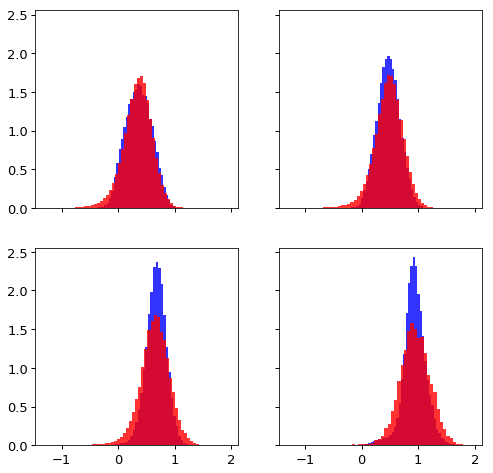

In [11]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, sharex=True,sharey=True, 
                                         figsize=(8,8))


sm_low1, sm_high1 = 9.75, 10.25
sdss_rhalf1, mock_rhalf1 = get_rhalf_samples(mock, sdss, sm_low1, sm_high1)
__=ax1.hist(np.log10(sdss_rhalf1), bins=50, normed=True, alpha=0.8, color='blue')
__=ax1.hist(np.log10(mock_rhalf1), bins=50, normed=True, alpha=0.8, color='red')

sm_low2, sm_high2 = 10.25, 10.75
sdss_rhalf2, mock_rhalf2 = get_rhalf_samples(mock, sdss, sm_low2, sm_high2)
__=ax2.hist(np.log10(sdss_rhalf2), bins=50, normed=True, alpha=0.8, color='blue')
__=ax2.hist(np.log10(mock_rhalf2), bins=50, normed=True, alpha=0.8, color='red')

sm_low3, sm_high3 = 10.75, 11.25
sdss_rhalf3, mock_rhalf3 = get_rhalf_samples(mock, sdss, sm_low3, sm_high3)
__=ax3.hist(np.log10(sdss_rhalf3), bins=50, normed=True, alpha=0.8, color='blue')
__=ax3.hist(np.log10(mock_rhalf3), bins=50, normed=True, alpha=0.8, color='red')

sm_low4, sm_high4 = 11.25, np.inf
sdss_rhalf4, mock_rhalf4 = get_rhalf_samples(mock, sdss, sm_low4, sm_high4)
__=ax4.hist(np.log10(sdss_rhalf4), bins=50, normed=True, alpha=0.8, color='blue')
__=ax4.hist(np.log10(mock_rhalf4), bins=50, normed=True, alpha=0.8, color='red')


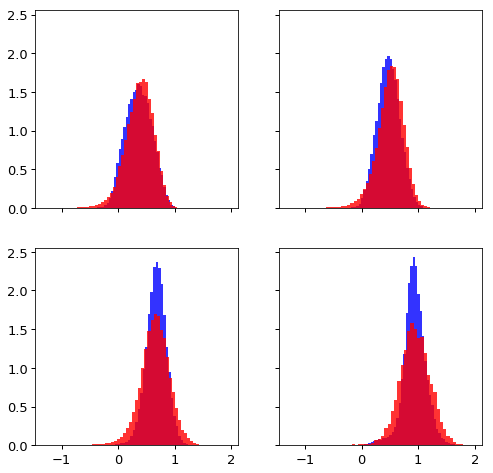

In [12]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, sharex=True,sharey=True, 
                                         figsize=(8,8))


sm_low1, sm_high1 = 9.75, 10.25
sdss_rhalf1, mock_rhalf1 = get_rhalf_samples(mock, sdss, sm_low1, sm_high1, 
                                             key='r50_magr_kpc_meert15_cam')
__=ax1.hist(np.log10(sdss_rhalf1), bins=50, normed=True, alpha=0.8, color='blue')
__=ax1.hist(np.log10(mock_rhalf1), bins=50, normed=True, alpha=0.8, color='red')

sm_low2, sm_high2 = 10.25, 10.75
sdss_rhalf2, mock_rhalf2 = get_rhalf_samples(mock, sdss, sm_low2, sm_high2,
                                            key='r50_magr_kpc_meert15_cam')
__=ax2.hist(np.log10(sdss_rhalf2), bins=50, normed=True, alpha=0.8, color='blue')
__=ax2.hist(np.log10(mock_rhalf2), bins=50, normed=True, alpha=0.8, color='red')

sm_low3, sm_high3 = 10.75, 11.25
sdss_rhalf3, mock_rhalf3 = get_rhalf_samples(mock, sdss, sm_low3, sm_high3,
                                            key='r50_magr_kpc_meert15_cam')
__=ax3.hist(np.log10(sdss_rhalf3), bins=50, normed=True, alpha=0.8, color='blue')
__=ax3.hist(np.log10(mock_rhalf3), bins=50, normed=True, alpha=0.8, color='red')

sm_low4, sm_high4 = 11.25, np.inf
sdss_rhalf4, mock_rhalf4 = get_rhalf_samples(mock, sdss, sm_low4, sm_high4,
                                            key='r50_magr_kpc_meert15_cam')
__=ax4.hist(np.log10(sdss_rhalf4), bins=50, normed=True, alpha=0.8, color='blue')
__=ax4.hist(np.log10(mock_rhalf4), bins=50, normed=True, alpha=0.8, color='red')
